### Problem statement :
 
Analyse the data generally & Understand how the students performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch & test preperation course

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Bharath Setty\Desktop\Sriraksha\Data Science\Datasets for practice\StudentsPerformance.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Gender
# Race/ethnicity
# Parental level of education
# lunch
# test preparation score
# math score
# reading score
# writing score

In [12]:
# Predicting test scores based on features

In [13]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
# Observation : There are no missing values in the dataset

In [15]:
df.duplicated().sum()

0

In [16]:
# Observation : There are no duplicates values in the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
print("Categories in 'gender' variable:",end=" ")
print(df['gender'].unique())


Categories in 'gender' variable: ['female' 'male']


In [21]:
df['math score'].dtype

dtype('int64')

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
# defining numerical & categorical columns

numerical_columns = df[['math score','reading score','writing score']]
categorical_columns = df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]


### Feature engineering

In [76]:
# Let me create 2 new columns for analysing the data - "total Score" & "Average"

In [25]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [26]:
df['average score'] = df['total score']/3                                     
df.head()                                                                                    

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [28]:
numerical_columns = df[['math score','reading score','writing score']]
categorical_columns = df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### Other Observations

**1.Students with Full Marks**

In [33]:

reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


**2.Students with less than 20 marks**

In [34]:
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in math: {math_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


**3.Average Score of students - data distribution**

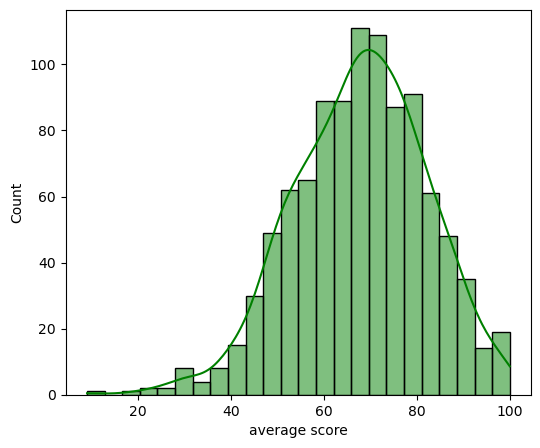

In [36]:

plt.figure(figsize=(6, 5))
sns.histplot(df['average score'], kde=True, color='g')      
plt.show()



#### Observation :

Average score is concentrated somewhere around 65 to 75.

**4.Analysis of 'average score' of students with respect to 'Gender'**

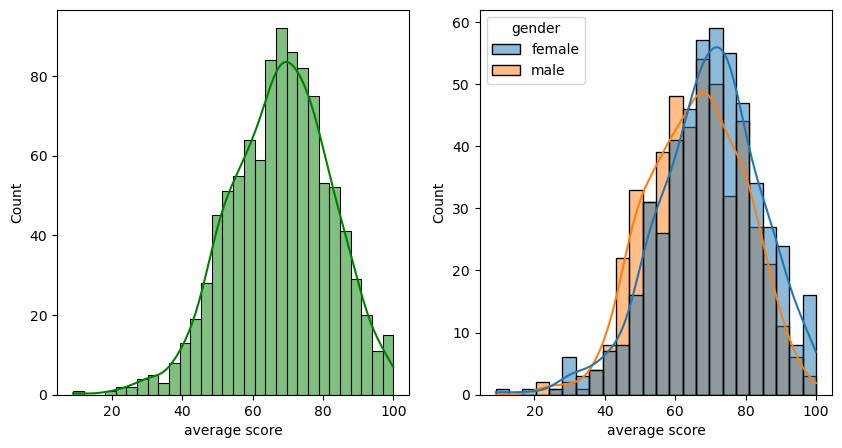

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

**Observation** :

The average score of male is slightly lesser than the average score of female students.

**5.Analysis of 'average score' of students with respect to 'race/ethnicity'**

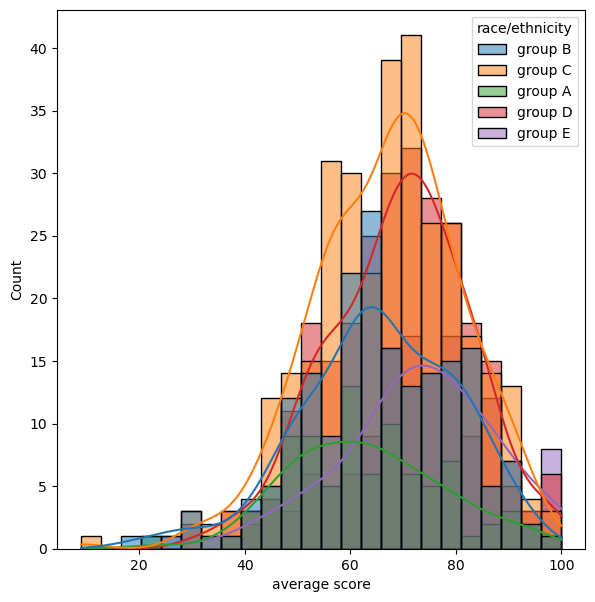

In [45]:
fig, axs = plt.subplots(1, figsize=(15,7))
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.show()

**6.Gender with race/ethnicity**

<Axes: xlabel='gender', ylabel='count'>

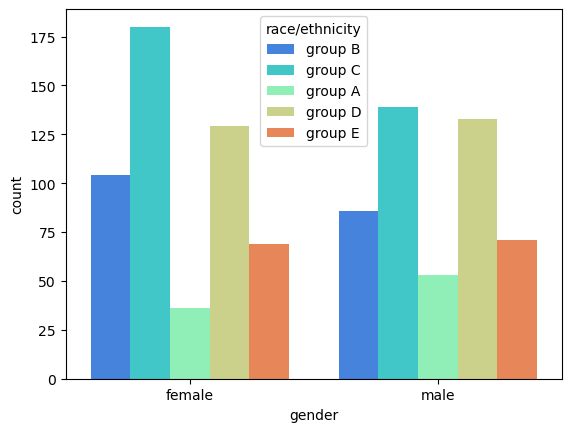

In [47]:
sns.countplot(x='gender',hue='race/ethnicity',data=df,palette='rainbow')

**7. Analysis of average score with respect to lunch (male & female categories)**

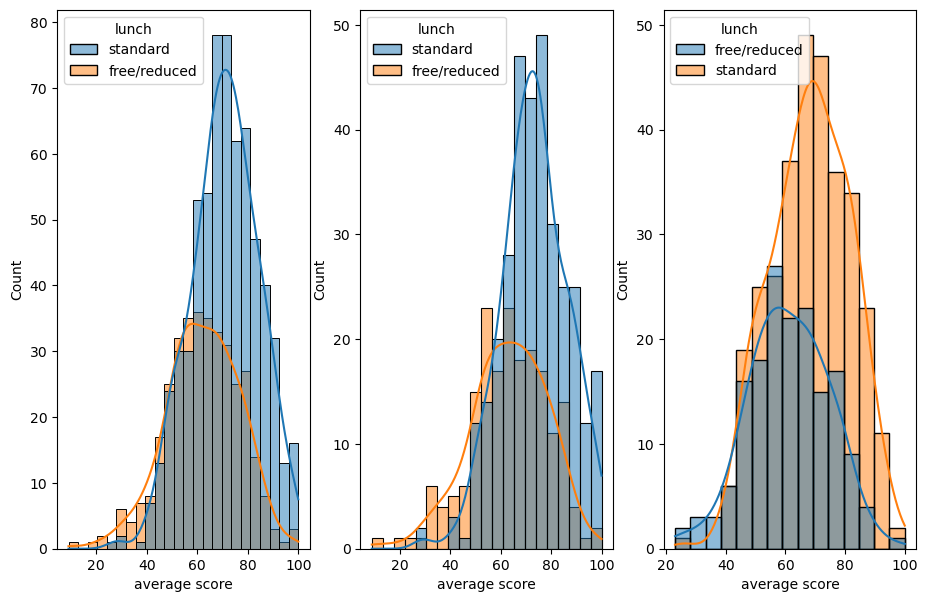

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average score',kde=True,hue='lunch')
plt.show()

**Observation** :

We can observe that a higher number of students using standard lunch option as against free/reduced lunch.  
However a significant amount of around 35% students are still using free/reduced lunch option.  
And this pattern appears to be almost similar across both gender categories as well.  

**8.Gender Distribution**

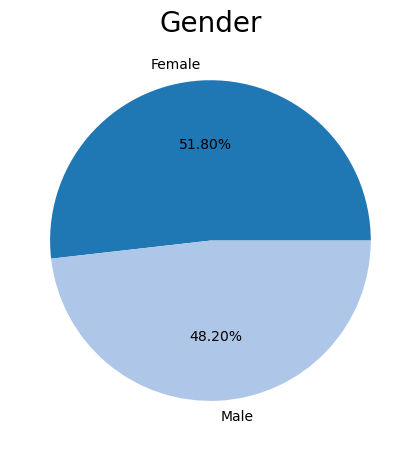

In [50]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['#1f77b4', '#aec7e8']  # Shades of blue

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.show()


**Observation** :

The dataset contains almost equal amount of distribution of male & female categories.

**9.Race/Ethnicity Percentage**

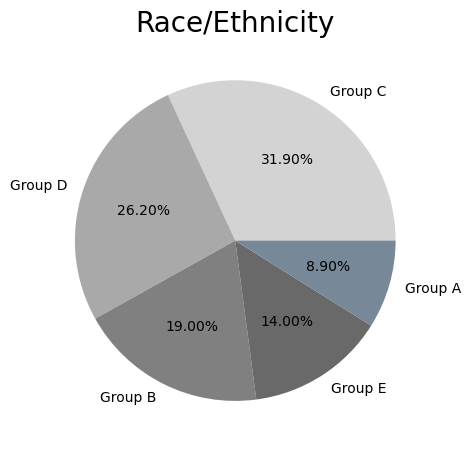

In [55]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969', '#778899']  # Soft shades of gray

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')
plt.show()


**Observation** :

Group C has the highest percentage of students with others gradually decreasing respectively as group D, group B, group E & group A being the least.

**10.Lunch Distribution**

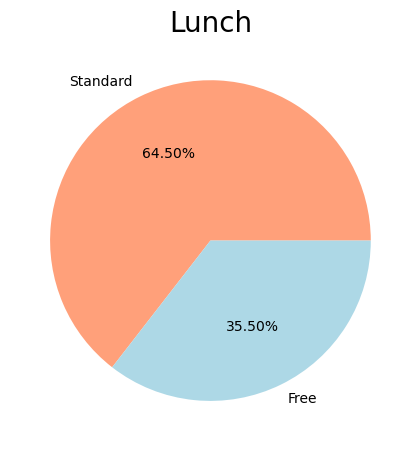

In [56]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['#FFA07A', '#ADD8E6']  # Soft pastel colors

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')
plt.show()


**Observation** :
    
Around 65% of the students are using Standard lunch option while around 35% of students opt for Free lunch option.

**11.Test Course & Parental Education** :

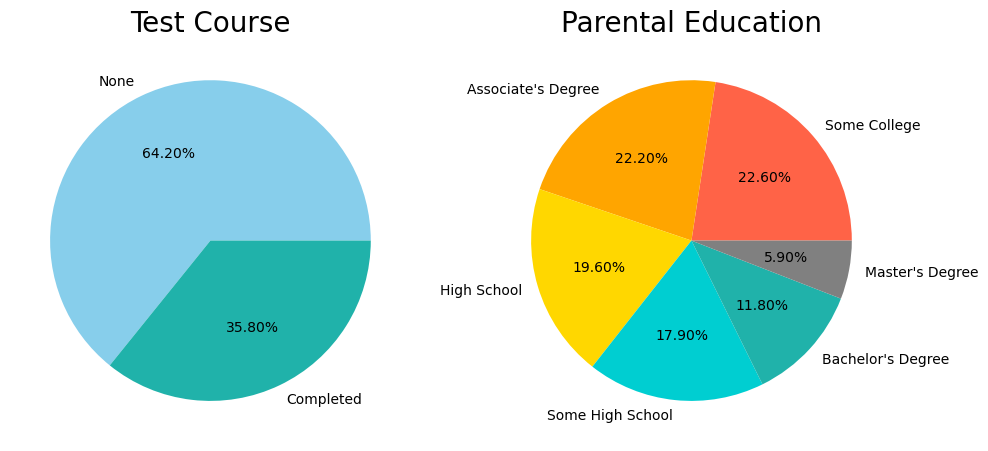

In [59]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

# Test Course pie chart
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
test_colors = ['#87CEEB', '#20B2AA']  # Blue shades

plt.pie(size, colors=test_colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Parental Education pie chart
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
edu_colors = ['#FF6347', '#FFA500', '#FFD700', '#00CED1', '#20B2AA', '#808080']  # Warm and cool colors

plt.pie(size, colors=edu_colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.show()


**12.Total score by gender**

        count        mean        std   min    25%    50%     75%    max
gender                                                                 
female  518.0  208.708494  43.625427  27.0  182.0  211.0  236.00  300.0
male    482.0  197.512448  41.096520  69.0  168.0  199.0  228.75  300.0


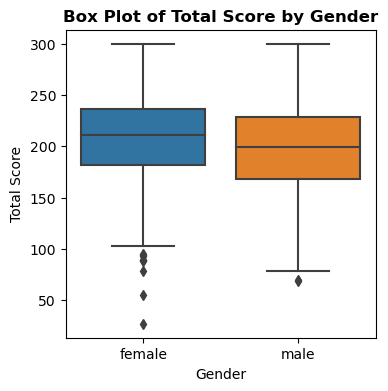

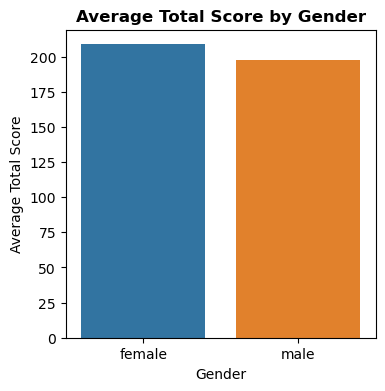

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.groupby('gender')['total score'].describe())

# Box plot
plt.figure(figsize=(4, 4))
sns.boxplot(x='gender', y='total score', data=df)
plt.title('Box Plot of Total Score by Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.show()

# Bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='gender', y='total score', data=df, ci=None)
plt.title('Average Total Score by Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')
plt.show()

In [65]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [66]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

**13.Parental level of education with respect to test preperation course & lunch**

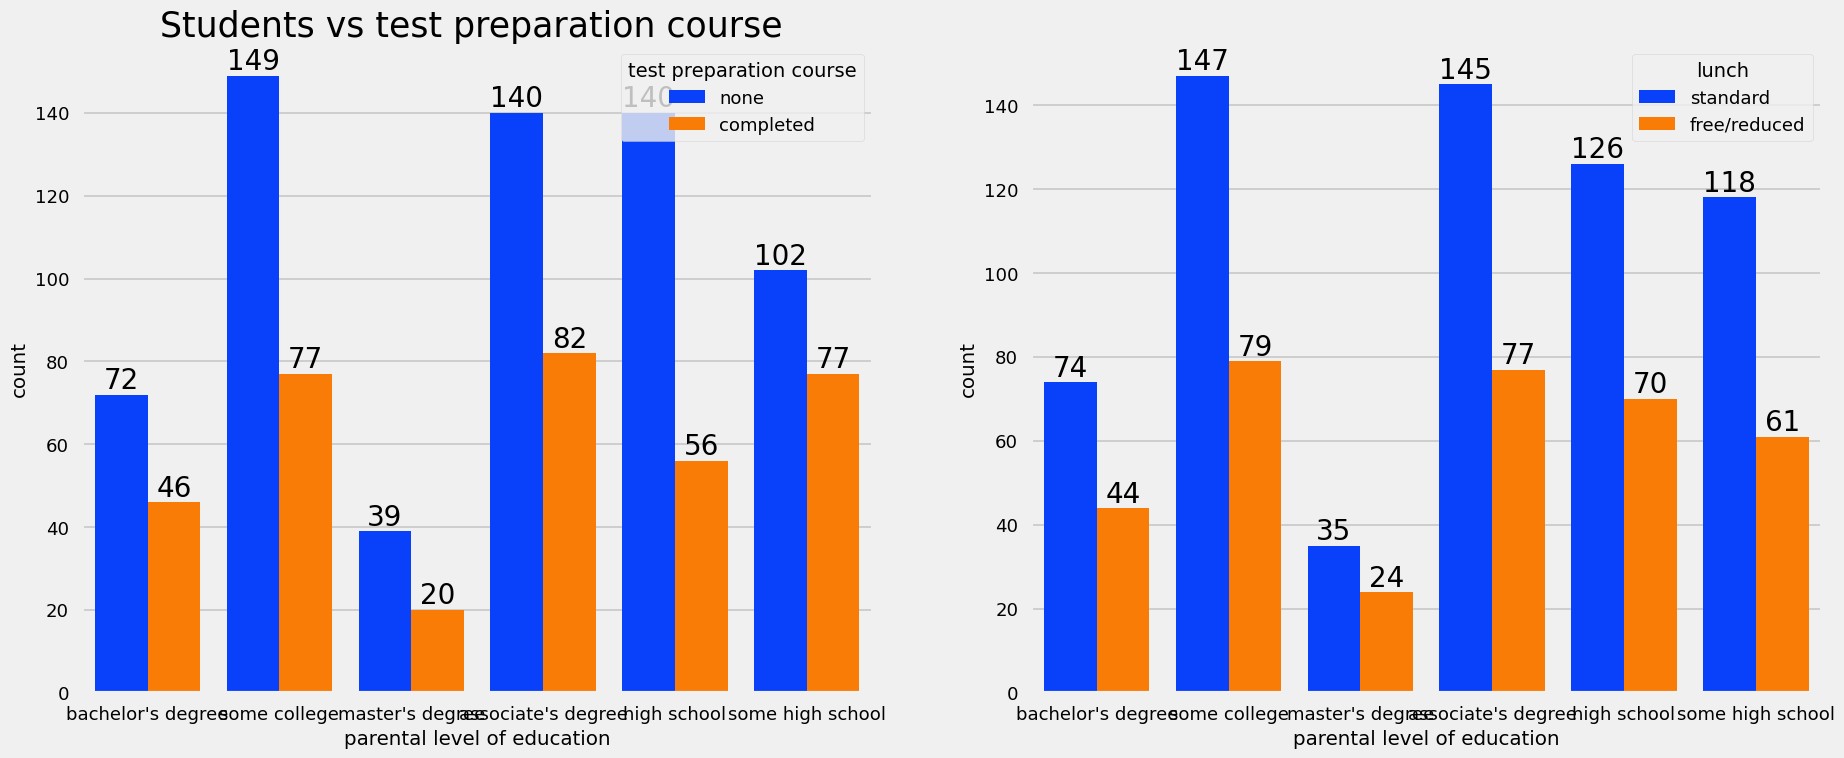

In [201]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

**14.Maths,writing & reading score with respect to lunch & test preperation course**

<Axes: xlabel='lunch', ylabel='writing score'>

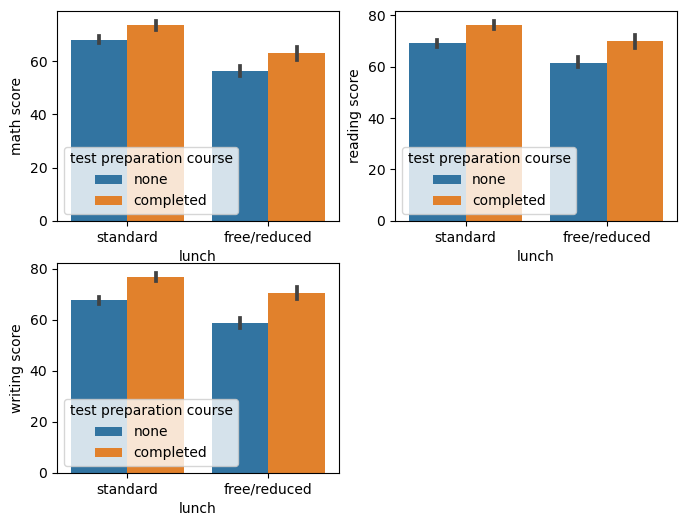

In [73]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

**15.Distribution of maths,reading,writing,average score**

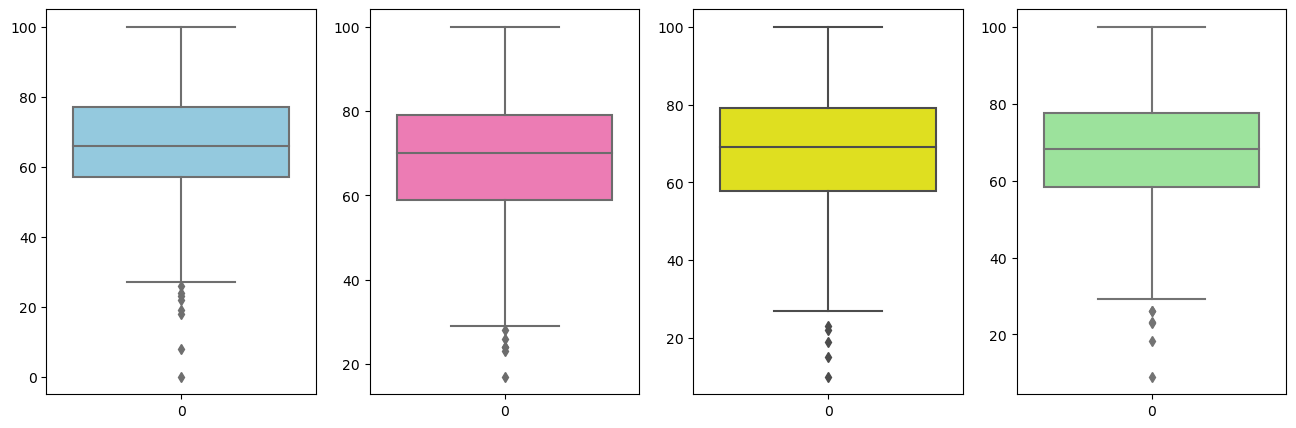

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

**16.Scores analysis**

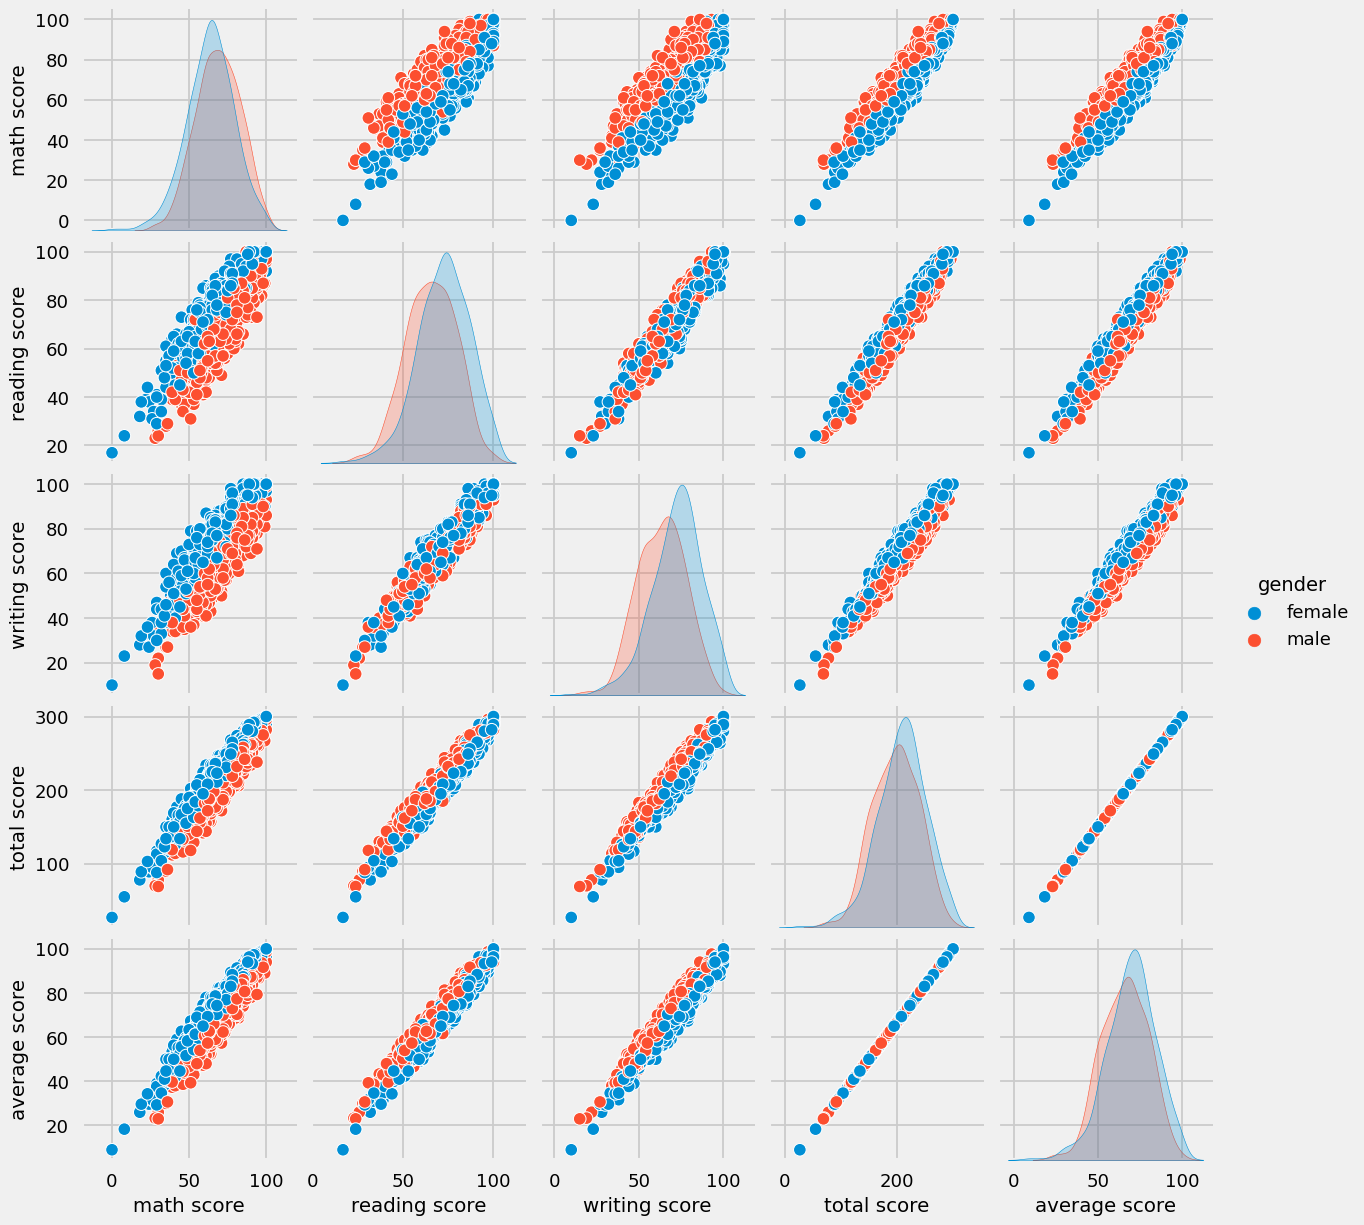

In [215]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

**17.Test preperation course & scoring**

In [77]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


**Strip plot**

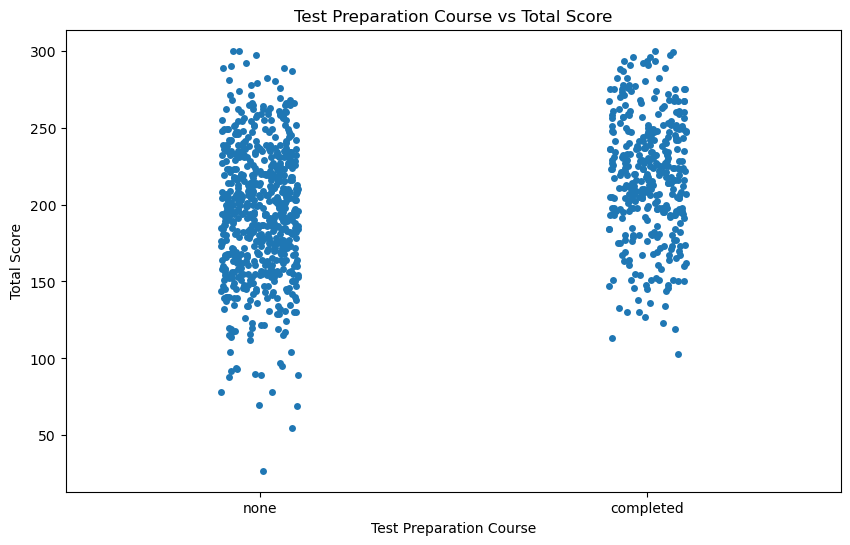

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='test preparation course', y='total score', data=df)
plt.title('Test Preparation Course vs Total Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Total Score')
plt.show()


**Observation** :

Taking test preperation course is suggested to be beneficial to the students. As we can observe that few students who have not taken the test preperation course seemed to have secured a very less total score as compared to those who have taken the test preperation course.

**18.Ethnicity & Total Scores**

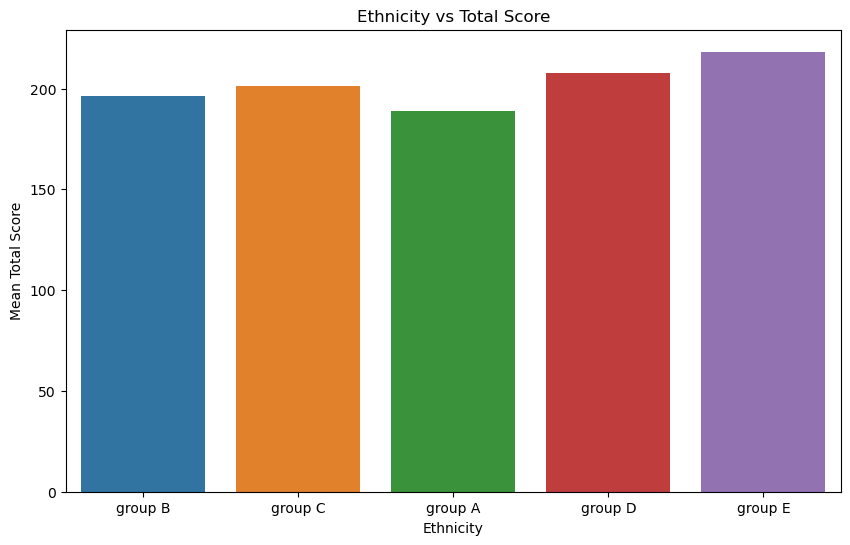

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='total score', data=df, ci=None)
plt.title('Ethnicity vs Total Score')
plt.xlabel('Ethnicity')
plt.ylabel('Mean Total Score')
plt.show()


**Observation**:

We can observe that almost all groups have secured around same average total score not much of a significant difference can be seen except that group E students have scored bit higher average total score as compared to other groups.

**19.Parental level of education & total scores**

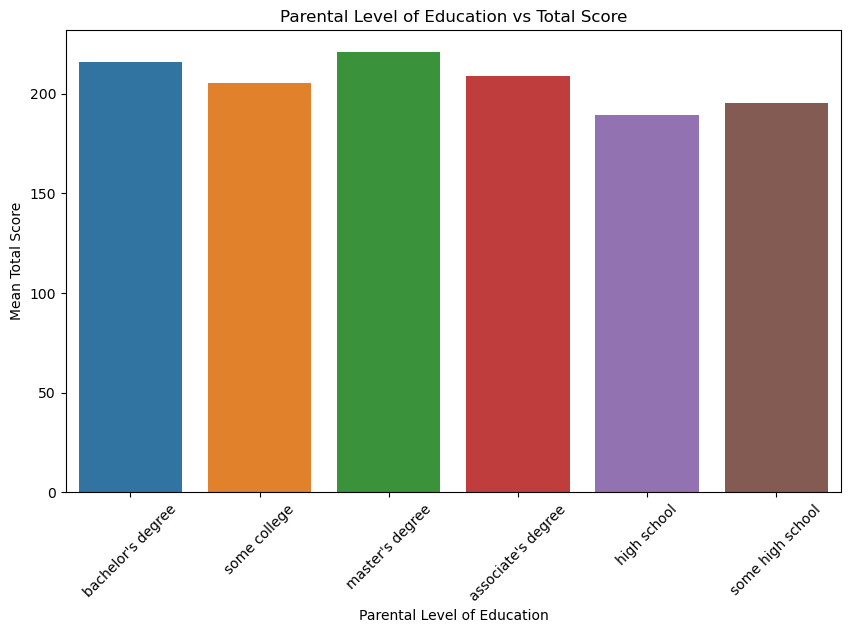

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='parental level of education', y='total score', data=df, ci=None)
plt.title('Parental Level of Education vs Total Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Mean Total Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Observation**:

Students having parents with only schooling seem to have secured slightly lesser average total score when compared to parents with other higher education. Thus we can say that parental level of education is slightly impacting the total scores of students.

**20.Lunch & Total scores**

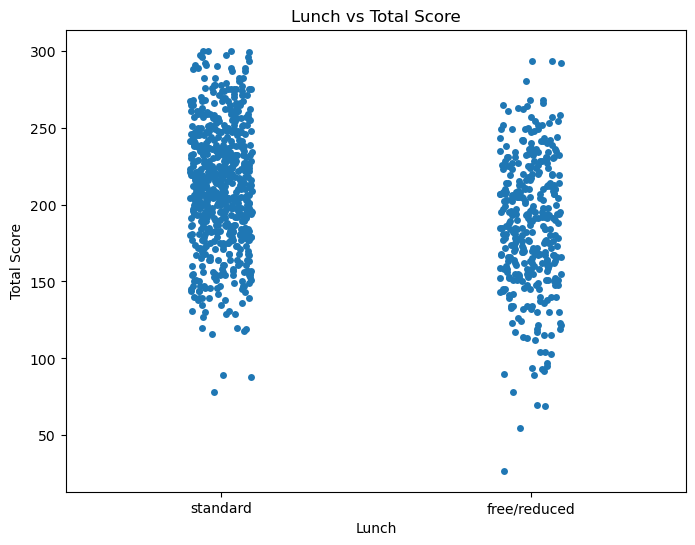

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.stripplot(x='lunch', y='total score', data=df)
plt.title('Lunch vs Total Score')
plt.xlabel('Lunch')
plt.ylabel('Total Score')
plt.show()


**Observation** :
    
- We can observe a good concentration of students performing average to top scores with having standard lunch as compared to free/reduced lunch option.

## CONCLUSION 


**GENERAL FINDINGS :** 

- The dataset contains almost equal amount of distribution of male & female categories.
- In the dataset,Group C has the highest percentage of students with others gradually decreasing respectively as group D, group B, group E & group A being the least.
- 64% of the students have not taken the test course while around 35% of the students have completed the test course.
- Around 38% of the parents have studied upto schooling only.
- Average score of students lies somewhere around 65 to 75 marks.
- A higher number of students are using standard lunch option as against free/reduced lunch. However a significant portion of around 35% students are still using free/reduced lunch option.And this pattern appears to be almost similar across both gender categories as well.
  
**ANALYSIS WITH RESPECT TO STUDENTS PERFORMANCE :**  
  
**Gender** : The average score of male students is slightly lesser than the average score of female students.  
**Ethnicity** : We can observe that almost all groups have secured around same average total score not much of a significant difference can be seen except that group E students have scored bit higher average total score as compared to other groups. So we can say that ethnicity is not affecting much in terms of total score.  
**Parental Level of Education** : Students having parents with only schooling seem to have secured slightly lesser average total score when compared to parents with other higher education. Thus we can say that parental level of education is slightly impacting the total scores of students.  
**Test Preperation Course** : Taking test preperation course is suggested to be beneficial to the students. As we can observe that few students who have not taken the test preperation course seemed to have secured a very less total score as compared to those who have taken the test preperation course.  
**Lunch Option** : We can observe a good concentration of students performing average to top scores with having standard lunch as compared to free/reduced lunch option.  

**We can say that, Gender, Ethnicity, Parental level of education are slightly impacting the students performance while Test Preperation Course & Lunch Option are having a moderate to significant influence on the students performance.**